<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Line Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on using line charts to analyze trends over time and across different categories in a dataset.



## Objectives


In this lab you will perform the following:


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 183.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 180.2 MB/s eta 0:00:00


In [49]:
!pip install seaborn

In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 138.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 140.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 157.8 MB/s eta 0:00:00


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



#### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


--2025-07-11 10:22:53--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
connected. to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... 
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  37.3MB/s    in 4.3s    

2025-07-11 10:22:58 (35.2 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



#### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt


#### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")


#### Display the first few rows to understand the structure of the data


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

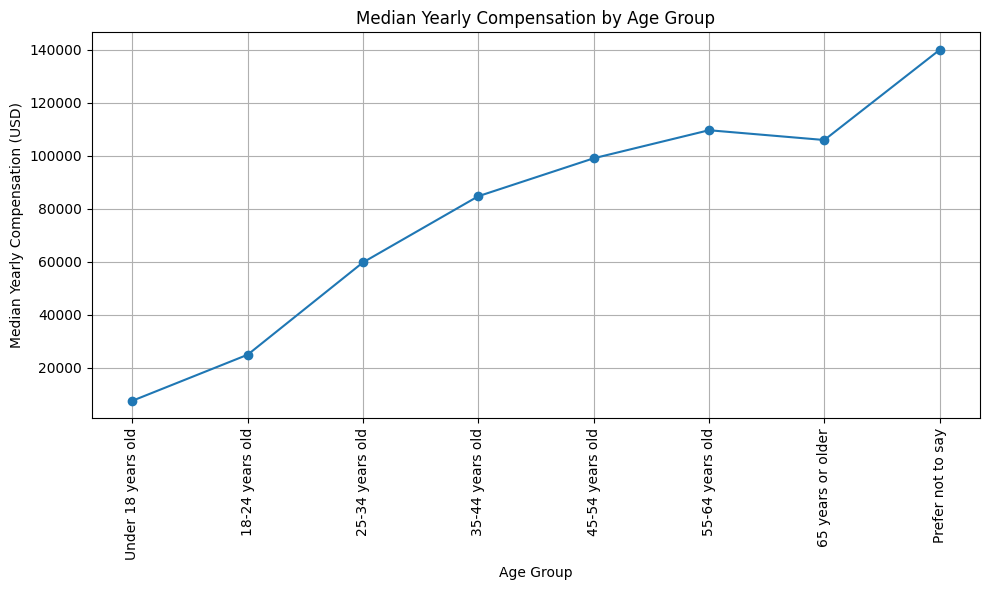

In [13]:
# Drop rows with missing Age or Compensation
df_filtered = df.dropna(subset=['Age', 'ConvertedCompYearly'])

# Group by Age and compute median compensation
df_grouped = df_filtered.groupby('Age')['ConvertedCompYearly'].median().reset_index()

# Define the correct age group order
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', 
             '35-44 years old', '45-54 years old', '55-64 years old', 
             '65 years or older', 'Prefer not to say']

# Convert 'Age' to ordered categorical type
df_grouped['Age'] = pd.Categorical(df_grouped['Age'], categories=age_order, ordered=True)

# Sort by age group
df_grouped = df_grouped.sort_values('Age')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['Age'], df_grouped['ConvertedCompYearly'], marker='o', linestyle='-')
plt.xticks(rotation=90)
plt.title("Median Yearly Compensation by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Median Yearly Compensation (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


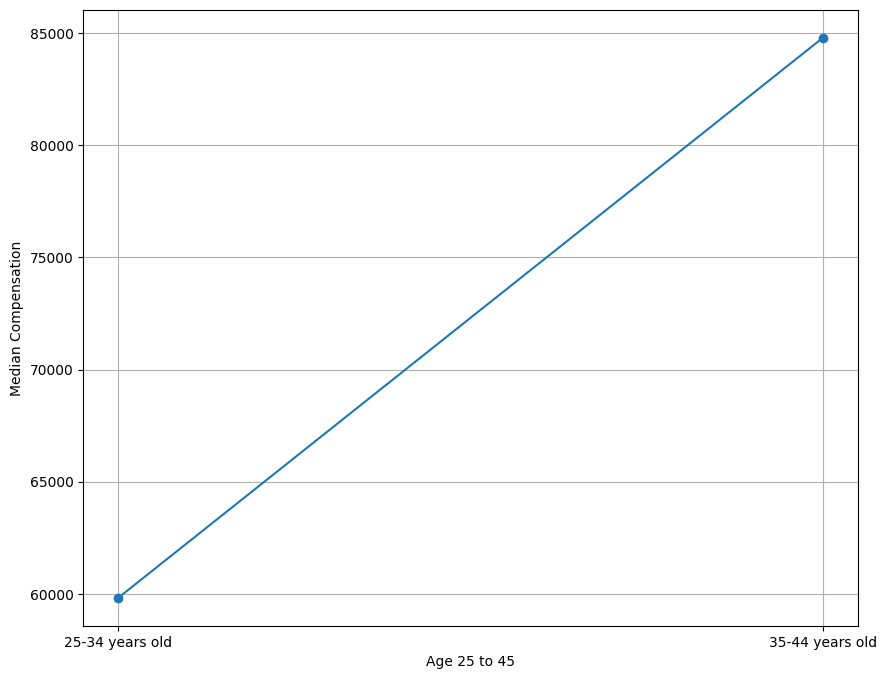

In [20]:
df_filtered = df_filtered[df_filtered['Age'].isin(['25-34 years old','35-44 years old'])]

df_grouped = df_filtered.groupby('Age')['ConvertedCompYearly'].median().reset_index()

plt.figure(figsize=(10, 8))
plt.plot(df_grouped['Age'],df_grouped['ConvertedCompYearly'],marker='o',linestyle='-')
plt.xlabel('Age Group 25 to 45')
plt.ylabel('Median Compensation')
plt.grid('True')
plt.show()

### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


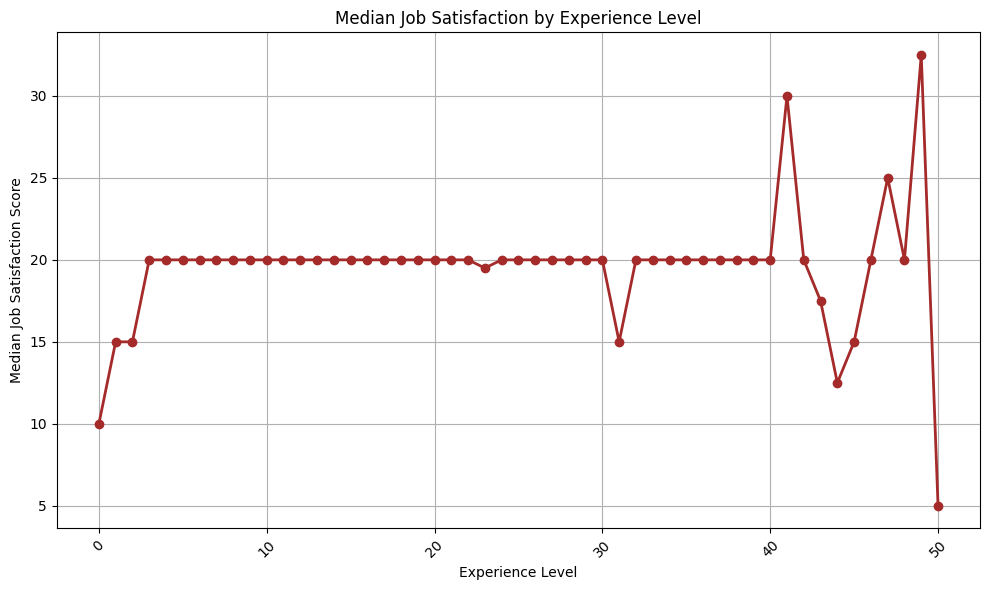

In [42]:
#Drop missing values
df_cleaned = df.dropna(subset=['JobSatPoints_6', 'YearsCodePro']).copy()

def clean_experience(val):
    if pd.isna(val):
        return None
    elif val == 'Less than 1 year':
        return 0
    elif val == 'More than 50 years':
        return 51
    else:
        return int(val)  

df_cleaned['Experience_Simple'] = df_cleaned['YearsCodePro'].apply(clean_experience)

experience_order = list(range(0, 51))
df_cleaned['Experience_Simple'] = pd.Categorical(df_cleaned['Experience_Simple'], categories=experience_order, ordered=True)

#Group by experience and calculate median satisfaction
grouped = df_cleaned.groupby('Experience_Simple', observed=False)['JobSatPoints_6'].median()

#Plot
plt.figure(figsize=(10, 6))
plt.plot(grouped.index, grouped.values, marker='o', color='brown', linewidth=2)

plt.title('Median Job Satisfaction by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Median Job Satisfaction Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


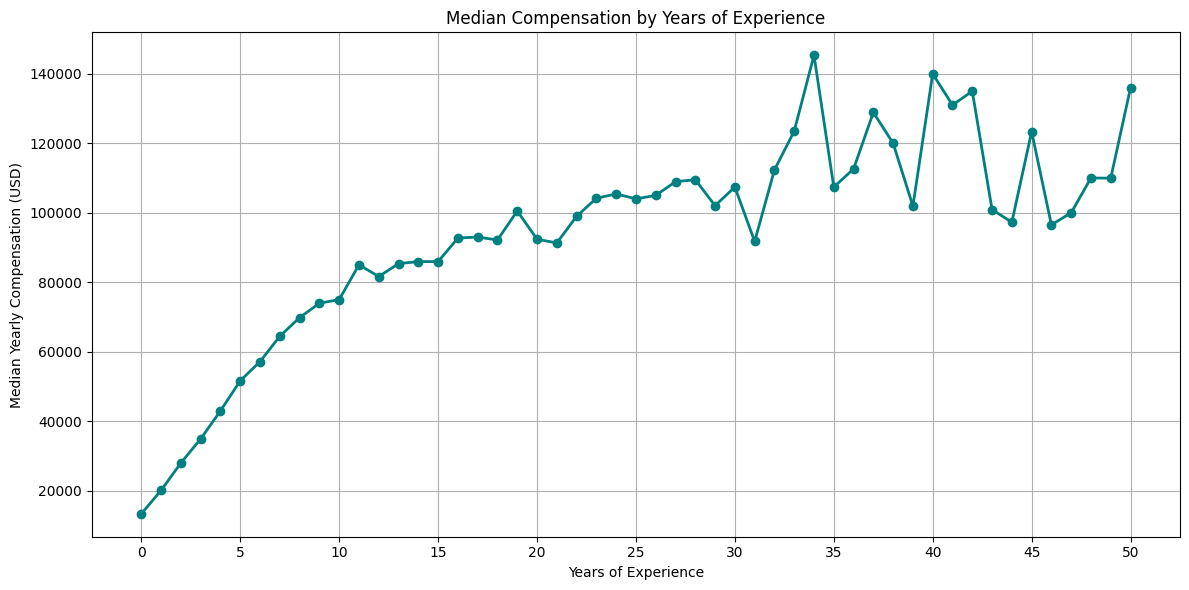

In [48]:
# Drop missing values
df_exp = df.dropna(subset=['WorkExp', 'ConvertedCompYearly'])

# Group and aggregate
median_comp = df_exp.groupby('WorkExp')['ConvertedCompYearly'].median().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(median_comp.index, median_comp.values, marker='o', linewidth=2, color='teal')

plt.title('Median Compensation by Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Median Yearly Compensation (USD)')
plt.grid(True)
plt.xticks(ticks=range(0, int(max(median_comp.index)) + 1, 5)) 
plt.tight_layout()
plt.show()

##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


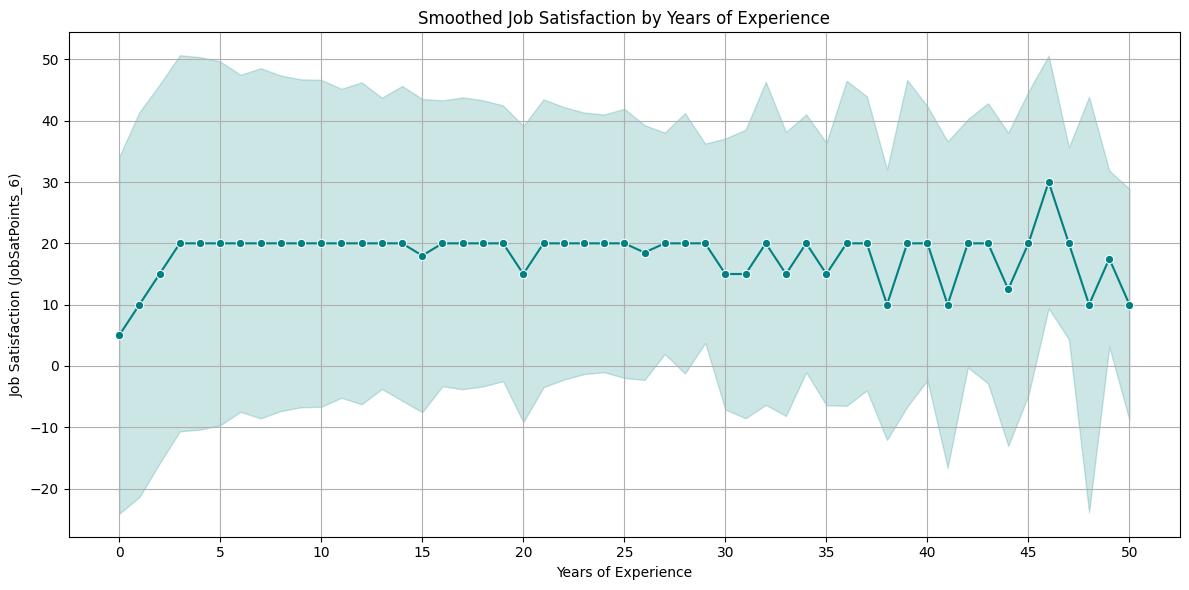

In [52]:
import seaborn as sns

# 1. Clean and prepare the data
df_clean = df[['WorkExp', 'JobSatPoints_6']].dropna()

plt.figure(figsize=(12, 6))

sns.lineplot(
    data=df_clean,
    x='WorkExp',
    y='JobSatPoints_6',
    errorbar='sd',           # 'sd' = standard deviation band, or use ci=95
    estimator='median',  
    color='teal'
)

plt.title('Smoothed Job Satisfaction by Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True)
plt.xticks(range(0, 55, 5))  # every 5 years
plt.tight_layout()
plt.show()

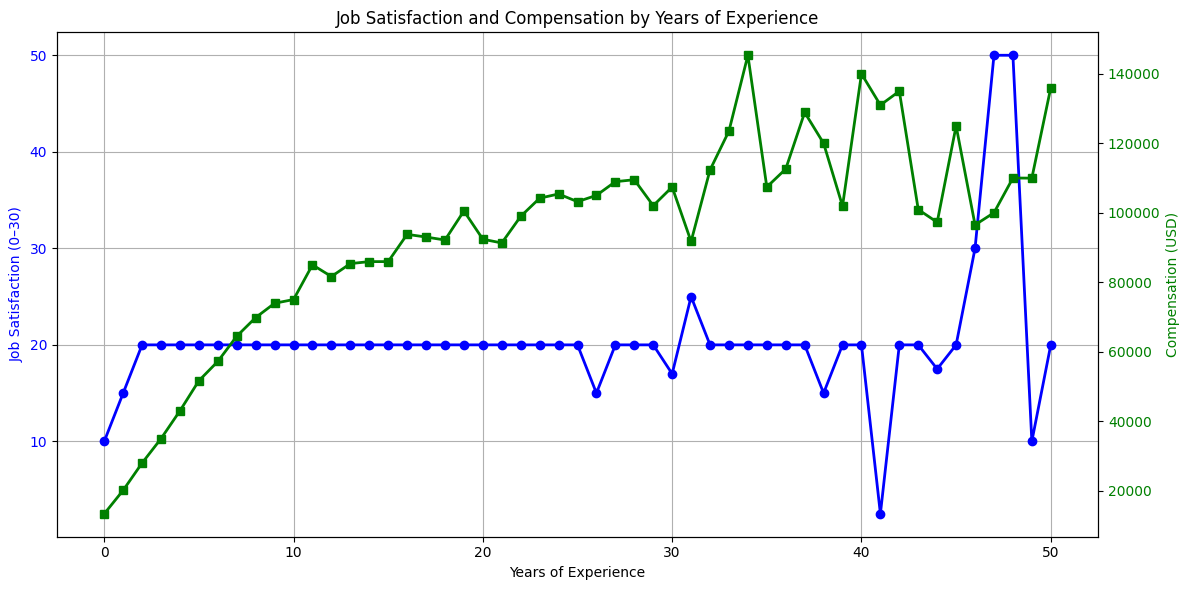

In [60]:
# Drop rows missing either satisfaction or compensation
df_exp = df.dropna(subset=['WorkExp', 'JobSatPoints_6', 'ConvertedCompYearly'])

grouped = df_exp.groupby('WorkExp').agg(median_satisfaction =('JobSatPoints_6','median'),median_compensation=('ConvertedCompYearly', 'median'))


fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot job satisfaction on primary y-axis
ax1.plot(grouped.index, grouped['median_satisfaction'],
         color='blue', marker='o', label='Median Job Satisfaction', linewidth=2)
ax1.set_xlabel('Years of Experience')
ax1.set_ylabel('Job Satisfaction (0–30)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Plot compensation on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(grouped.index, grouped['median_compensation'],
         color='green', marker='s', label='Median Compensation', linewidth=2)
ax2.set_ylabel('Compensation (USD)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Title & Layout
plt.title('Job Satisfaction and Compensation by Years of Experience')
fig.tight_layout()
plt.show()

#### Final Step: Review


In this lab, you focused on analyzing trends in compensation and job satisfaction, specifically exploring how these metrics change with age and experience levels using line charts.


### Summary


In this lab, you explored essential data visualization techniques with a focus on analyzing trends using line charts. You learned to:

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, you gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
